# Train Log 20181024 - voxel size: 0.4

## Results
```
2018-10-24 17:41:02.329518   Train one epoch  20 /  20


100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:44:32.096031  [Epoch 19] mean loss: 0.000065
2018-10-24 17:44:32.097345  [Epoch 19] accuracy: 0.993991
2018-10-24 17:44:32.097980  [Epoch 19] avg class acc: 0.997512
2018-10-24 17:44:32.098323  [Epoch 19] indivisual [0] class recall: 0.992537
2018-10-24 17:44:32.098658  [Epoch 19] indivisual [0] class precision: 1.000000
2018-10-24 17:44:32.098993  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-24 17:44:32.099160  [Epoch 19] indivisual [1] class precision: 1.000000
2018-10-24 17:44:32.099403  [Epoch 19] indivisual [2] class recall: 1.000000
2018-10-24 17:44:32.099537  [Epoch 19] indivisual [2] class precision: 0.975610
2018-10-24 17:44:32.100111   Evaluation one (validation set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:44:44.453586  [Epoch 19] vali mean loss: 0.000260
2018-10-24 17:44:44.454158  [Epoch 19] vali accuracy: 0.998138
2018-10-24 17:44:44.454633  [Epoch 19] vali avg class acc: 1.000000
2018-10-24 17:44:44.455145  [Epoch 19] vali indivisual [0] class recall: 1.000000
2018-10-24 17:44:44.455267  [Epoch 19] vali indivisual [0] class precision: 1.000000
2018-10-24 17:44:44.455758  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-24 17:44:44.455941  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-24 17:44:44.456084  [Epoch 19] vali indivisual [2] class recall: 1.000000
2018-10-24 17:44:44.456282  [Epoch 19] vali indivisual [2] class precision: 1.000000
2018-10-24 17:44:44.456691   Evaluation one (test set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 17:44:56.795768  [Epoch 19] test mean loss: 0.000260
2018-10-24 17:44:56.796600  [Epoch 19] test accuracy: 0.997103
2018-10-24 17:44:56.798164  [Epoch 19] test avg class acc: 1.000000
2018-10-24 17:44:56.798627  [Epoch 19] test indivisual [0] class recall: 1.000000
2018-10-24 17:44:56.798794  [Epoch 19] test indivisual [0] class precision: 1.000000
2018-10-24 17:44:56.798890  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-24 17:44:56.799201  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-24 17:44:56.799805  [Epoch 19] test indivisual [2] class recall: 1.000000
2018-10-24 17:44:56.800171  [Epoch 19] test indivisual [2] class precision: 1.000000

```

## Trained model
* [Download link]()

## Evaluation
* Incorrect sample
![results]()

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import time , datetime

sys.path.append( os.path.abspath('../../../Dataset/scripts'))
from utils import *

sys.path.append( os.path.abspath('../../model') )
from train import *
import model as MODEL

In [2]:
""" Path """

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_400_20181022_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_400_20181022_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_400_20181022_ndb_aug_v2_20181020/vali.h5')

log_path = os.path.abspath('./train_log_20181024_v4.txt')

model_save_path = os.path.abspath('./model')
if not os.path.isdir(model_save_path) : os.mkdir(model_save_path)

""" Parameters """
GPU_INDEX = 0
NUM_POINT = 256
NUM_CLASSES = 3

BN_INIT_DECAY = 0.5
BN_DECAY_DECAY_RATE = 0.5
BN_DECAY_DECAY_STEP = float(200000)
BN_DECAY_CLIP = 0.99
DECAY_STEP = BN_DECAY_DECAY_STEP
DECAY_RATE = BN_DECAY_DECAY_RATE

BATCH_SIZE = 250

MOMENTUM = 0.9

BASE_LEARNING_RATE = 0.001

OPTIMIZER = 'adam'

MAX_EPOCH = 20

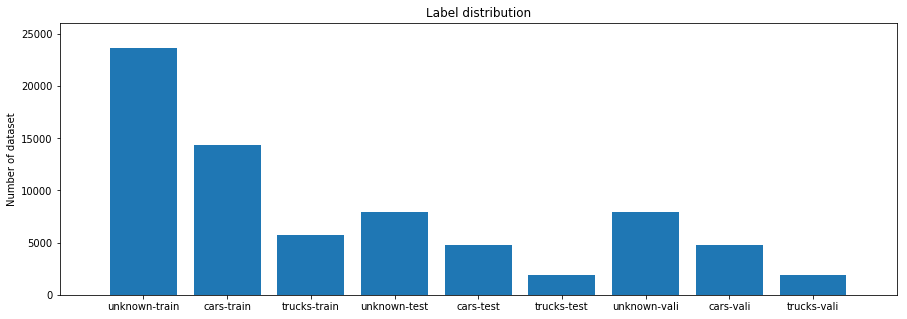

In [3]:
""" Load dataset"""

data = []
label = []

data_train, label_train = load_h5(data_train_path)
data_vali, label_vali = load_h5(data_vali_path)
data_test, label_test = load_h5(data_test_path)

data.append(data_train)
data.append(data_vali)
data.append(data_test)

label.append(label_train)
label.append(label_vali)
label.append(label_test)

""" Data statistics"""

label_list = [0,1,2]

y_val = []
for i in range( len ( data) ):
    for j in range ( len ( label_list ) ):
        y_val.append(np.sum(label[i] == label_list[j]))

x_name=('unknown-train', 'cars-train', 'trucks-train', 
        'unknown-test', 'cars-test', 'trucks-test', 
        'unknown-vali', 'cars-vali', 'trucks-vali')

index = range( len(x_name) )

plt.figure(figsize=(15,5))
plt.bar(index, y_val, tick_label=x_name, align='center')
plt.ylabel('Number of dataset')
plt.title('Label distribution')
plt.xlim( -1, len(x_name))
plt.ylim( 0, np.max(y_val) * 1.1 )
plt.show()

In [4]:
""" log file """
LOG_FOUT = open(log_path, 'w')

def log_string(out_str):
    out_str = str( datetime.datetime.fromtimestamp( time.time() ) ) + "  " + out_str
    LOG_FOUT.write(out_str+'\n')
    LOG_FOUT.flush()
    print(out_str)
    
    
def get_learning_rate(batch):
    learning_rate = tf.train.exponential_decay(
                        BASE_LEARNING_RATE,  # Base learning rate.
                        batch * BATCH_SIZE,  # Current index into the dataset.
                        DECAY_STEP,          # Decay step.
                        DECAY_RATE,          # Decay rate.
                        staircase=True)
    learning_rate = tf.maximum(learning_rate, 0.00001) # CLIP THE LEARNING RATE!
    return learning_rate        

def get_bn_decay(batch):
    bn_momentum = tf.train.exponential_decay(
                      BN_INIT_DECAY,
                      batch * BATCH_SIZE,
                      BN_DECAY_DECAY_STEP,
                      BN_DECAY_DECAY_RATE,
                      staircase=True)
    bn_decay = tf.minimum(BN_DECAY_CLIP, 1 - bn_momentum)
    return bn_decay

""" load traing model """
with tf.Graph().as_default():
    with tf.device('/gpu:'+str(GPU_INDEX)):
        pointclouds_pl, labels_pl = MODEL.placeholder_inputs(BATCH_SIZE, NUM_POINT)
        is_training_pl = tf.placeholder(tf.bool, shape=())
        print(is_training_pl)

        # Note the global_step=batch parameter to minimize. 
        # That tells the optimizer to helpfully increment the 'batch' parameter for you every time it trains.
        batch = tf.Variable(0)
        bn_decay = get_bn_decay(batch)
        tf.summary.scalar('bn_decay', bn_decay)

        # Get model and loss 
        pred, end_points = MODEL.get_model(pointclouds_pl, is_training_pl, bn_decay=bn_decay)
        loss = MODEL.get_loss(pred, labels_pl, end_points)
        tf.summary.scalar('loss', loss)

        correct = tf.equal(tf.argmax(pred, 1), tf.to_int64(labels_pl))
        accuracy = tf.reduce_sum(tf.cast(correct, tf.float32)) / float(BATCH_SIZE)
        tf.summary.scalar('accuracy', accuracy)

        # Get training operator
        learning_rate = get_learning_rate(batch)
        tf.summary.scalar('learning_rate', learning_rate)
        if OPTIMIZER == 'momentum':
            optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=MOMENTUM)
        elif OPTIMIZER == 'adam':
            optimizer = tf.train.AdamOptimizer(learning_rate)
        train_op = optimizer.minimize(loss, global_step=batch)

        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

    # Create a session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    config.log_device_placement = False
    sess = tf.Session(config=config)

    # Add summary writers
    #merged = tf.merge_all_summaries()
    merged = tf.summary.merge_all()

    train_writer_path = os.path.abspath('./train')
    if os.path.isdir(train_writer_path): os.system('rm -r {}'.format(train_writer_path))
    os.mkdir(train_writer_path)
        
    test_writer_path = os.path.abspath('./test')
    if os.path.isdir(test_writer_path): os.system('rm -r {}'.format(test_writer_path))
    os.mkdir(test_writer_path)
    
    
    train_writer = tf.summary.FileWriter(train_writer_path, sess.graph)
    test_writer = tf.summary.FileWriter(test_writer_path)
    
    
    # Init variables
    init = tf.global_variables_initializer()
    # To fix the bug introduced in TF 0.12.1 as in
    # http://stackoverflow.com/questions/41543774/invalidargumenterror-for-tensor-bool-tensorflow-0-12-1
    #sess.run(init)
    sess.run(init, {is_training_pl: True})

    ops = {'pointclouds_pl': pointclouds_pl,
           'labels_pl': labels_pl,
           'is_training_pl': is_training_pl,
           'pred': pred,
           'loss': loss,
           'train_op': train_op,
           'merged': merged,
           'step': batch}
    
    data_train = np.concatenate(data[:2])
    label_train = np.concatenate(label[:2])
    
    data_vali = data[1]
    label_vali = label[1]
    
    data_test = data[2]
    label_test = label[2]
    
        
    for epoch in range(MAX_EPOCH):
        
        ## Training
        log_string ( " Train one epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = True
        
        # Shuffle train files
        train_file_idxs = np.arange(0, data_train.shape[0])
        np.random.shuffle(train_file_idxs)
        
        current_data = data_train[train_file_idxs] 
        current_label = label_train[train_file_idxs]
              
        ## Evaluation metric
        total_correct = 0
        total_seen = 0
        loss_sum = 0
        
        total_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
            
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE           

            # Augment batched point clouds by rotation and jittering
            rotated_data = provider.rotate_point_cloud(current_data[start_idx:end_idx, :, :])
            jittered_data = provider.jitter_point_cloud(rotated_data)
            
            feed_dict = {ops['pointclouds_pl']: jittered_data,
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training,}
            
            summary, step, _, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['train_op'], ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            train_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            loss_sum += loss_val
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    


        ## Evaluation using validation set    
        log_string ( " Evaluation one (validation set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle validation files
        file_idxs = np.arange(0, data_vali.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_vali[file_idxs]
        current_label = label_vali[file_idxs]
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            # test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] vali mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class) / np.array(total_class) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] vali indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] vali indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
            
        ## Evaluation using test set    
        log_string ( " Evaluation one (test set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle test files
        file_idxs = np.arange(0, data_test.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_test[file_idxs]
        current_label = label_test[file_idxs]
        
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] test mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] test accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] test avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] test indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] test indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
 
        # Save the variables to disk.
        if epoch % 10 == 0:
            save_path = saver.save(sess, os.path.join(model_save_path, "model.ckpt"))
            log_string("Model saved in file: %s" % save_path)
                

Tensor("Placeholder_2:0", shape=(), dtype=bool, device=/device:GPU:0)
INFO:tensorflow:Summary name classify loss is illegal; using classify_loss instead.
INFO:tensorflow:Summary name mat loss is illegal; using mat_loss instead.
2018-10-24 16:26:45.643581   Train one epoch   1 /  20


100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-24 16:30:16.100159  [Epoch 0] mean loss: 0.002737
2018-10-24 16:30:16.100937  [Epoch 0] accuracy: 0.860343
2018-10-24 16:30:16.101915  [Epoch 0] avg class acc: 0.902091
2018-10-24 16:30:16.102376  [Epoch 0] indivisual [0] class recall: 0.885714
2018-10-24 16:30:16.102590  [Epoch 0] indivisual [0] class precision: 0.946565
2018-10-24 16:30:16.102731  [Epoch 0] indivisual [1] class recall: 0.963415
2018-10-24 16:30:16.103253  [Epoch 0] indivisual [1] class precision: 0.908046
2018-10-24 16:30:16.103457  [Epoch 0] indivisual [2] class recall: 0.857143
2018-10-24 16:30:16.103577  [Epoch 0] indivisual [2] class precision: 0.750000
2018-10-24 16:30:16.103755   Evaluation one (validation set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.66it/s]

2018-10-24 16:30:28.660346  [Epoch 0] vali mean loss: 0.010996
2018-10-24 16:30:28.661059  [Epoch 0] vali accuracy: 0.951931
2018-10-24 16:30:28.661428  [Epoch 0] vali avg class acc: 0.000000
2018-10-24 16:30:28.661698  [Epoch 0] vali indivisual [0] class recall: 0.955882
2018-10-24 16:30:28.661982  [Epoch 0] vali indivisual [0] class precision: 0.921986
2018-10-24 16:30:28.662136  [Epoch 0] vali indivisual [1] class recall: 0.945205
2018-10-24 16:30:28.662673  [Epoch 0] vali indivisual [1] class precision: 0.971831
2018-10-24 16:30:28.662842  [Epoch 0] vali indivisual [2] class recall: 0.804878
2018-10-24 16:30:28.663274  [Epoch 0] vali indivisual [2] class precision: 0.868421
2018-10-24 16:30:28.663436   Evaluation one (test set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.69it/s]


2018-10-24 16:30:41.155085  [Epoch 0] test mean loss: 0.010996
2018-10-24 16:30:41.155401  [Epoch 0] test accuracy: 0.951655
2018-10-24 16:30:41.157432  [Epoch 0] test avg class acc: 0.947901
2018-10-24 16:30:41.157865  [Epoch 0] test indivisual [0] class recall: 0.986111
2018-10-24 16:30:41.158190  [Epoch 0] test indivisual [0] class precision: 0.959459
2018-10-24 16:30:41.158330  [Epoch 0] test indivisual [1] class recall: 0.961039
2018-10-24 16:30:41.158462  [Epoch 0] test indivisual [1] class precision: 1.000000
2018-10-24 16:30:41.158770  [Epoch 0] test indivisual [2] class recall: 0.896552
2018-10-24 16:30:41.158958  [Epoch 0] test indivisual [2] class precision: 0.928571
2018-10-24 16:30:42.011819  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181023_v4/model/model.ckpt
2018-10-24 16:30:42.012200   Train one epoch   2 /  20


100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 16:34:11.245191  [Epoch 1] mean loss: 0.000711
2018-10-24 16:34:11.245827  [Epoch 1] accuracy: 0.940464
2018-10-24 16:34:11.246430  [Epoch 1] avg class acc: 0.947701
2018-10-24 16:34:11.246794  [Epoch 1] indivisual [0] class recall: 0.920290
2018-10-24 16:34:11.247113  [Epoch 1] indivisual [0] class precision: 0.984496
2018-10-24 16:34:11.247445  [Epoch 1] indivisual [1] class recall: 0.966292
2018-10-24 16:34:11.247922  [Epoch 1] indivisual [1] class precision: 1.000000
2018-10-24 16:34:11.248200  [Epoch 1] indivisual [2] class recall: 0.956522
2018-10-24 16:34:11.248447  [Epoch 1] indivisual [2] class precision: 0.628571
2018-10-24 16:34:11.248656   Evaluation one (validation set) epoch   2 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-24 16:34:23.700019  [Epoch 1] vali mean loss: 0.002857
2018-10-24 16:34:23.700317  [Epoch 1] vali accuracy: 0.932552
2018-10-24 16:34:23.700791  [Epoch 1] vali avg class acc: 0.000000
2018-10-24 16:34:23.701005  [Epoch 1] vali indivisual [0] class recall: 0.976378
2018-10-24 16:34:23.701296  [Epoch 1] vali indivisual [0] class precision: 0.861111
2018-10-24 16:34:23.702012  [Epoch 1] vali indivisual [1] class recall: 0.987952
2018-10-24 16:34:23.702436  [Epoch 1] vali indivisual [1] class precision: 0.976190
2018-10-24 16:34:23.702686  [Epoch 1] vali indivisual [2] class recall: 0.525000
2018-10-24 16:34:23.702774  [Epoch 1] vali indivisual [2] class precision: 0.954545
2018-10-24 16:34:23.703021   Evaluation one (test set) epoch   2 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-24 16:34:36.108737  [Epoch 1] test mean loss: 0.002857
2018-10-24 16:34:36.109177  [Epoch 1] test accuracy: 0.937034
2018-10-24 16:34:36.111471  [Epoch 1] test avg class acc: 0.836417
2018-10-24 16:34:36.111714  [Epoch 1] test indivisual [0] class recall: 0.984252
2018-10-24 16:34:36.111913  [Epoch 1] test indivisual [0] class precision: 0.868056
2018-10-24 16:34:36.112082  [Epoch 1] test indivisual [1] class recall: 1.000000
2018-10-24 16:34:36.112211  [Epoch 1] test indivisual [1] class precision: 1.000000
2018-10-24 16:34:36.112909  [Epoch 1] test indivisual [2] class recall: 0.525000
2018-10-24 16:34:36.113180  [Epoch 1] test indivisual [2] class precision: 0.913043
2018-10-24 16:34:36.113632   Train one epoch   3 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 16:38:05.617711  [Epoch 2] mean loss: 0.000534
2018-10-24 16:38:05.618025  [Epoch 2] accuracy: 0.952927
2018-10-24 16:38:05.618470  [Epoch 2] avg class acc: 0.936882
2018-10-24 16:38:05.619111  [Epoch 2] indivisual [0] class recall: 0.968254
2018-10-24 16:38:05.619309  [Epoch 2] indivisual [0] class precision: 0.945736
2018-10-24 16:38:05.619522  [Epoch 2] indivisual [1] class recall: 0.967391
2018-10-24 16:38:05.619664  [Epoch 2] indivisual [1] class precision: 1.000000
2018-10-24 16:38:05.620261  [Epoch 2] indivisual [2] class recall: 0.875000
2018-10-24 16:38:05.620626  [Epoch 2] indivisual [2] class precision: 0.875000
2018-10-24 16:38:05.620855   Evaluation one (validation set) epoch   3 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 16:38:17.977244  [Epoch 2] vali mean loss: 0.002144
2018-10-24 16:38:17.977831  [Epoch 2] vali accuracy: 0.890966
2018-10-24 16:38:17.978624  [Epoch 2] vali avg class acc: 0.333333
2018-10-24 16:38:17.978983  [Epoch 2] vali indivisual [0] class recall: 1.000000
2018-10-24 16:38:17.979468  [Epoch 2] vali indivisual [0] class precision: 0.837209
2018-10-24 16:38:17.979591  [Epoch 2] vali indivisual [1] class recall: 0.968750
2018-10-24 16:38:17.979695  [Epoch 2] vali indivisual [1] class precision: 0.984127
2018-10-24 16:38:17.979971  [Epoch 2] vali indivisual [2] class recall: 0.357143
2018-10-24 16:38:17.980441  [Epoch 2] vali indivisual [2] class precision: 1.000000
2018-10-24 16:38:17.980718   Evaluation one (test set) epoch   3 /  20



100%|██████████| 58/58 [00:12<00:00,  4.68it/s]

2018-10-24 16:38:30.475403  [Epoch 2] test mean loss: 0.002144
2018-10-24 16:38:30.476358  [Epoch 2] test accuracy: 0.890207
2018-10-24 16:38:30.476966  [Epoch 2] test avg class acc: 0.772169
2018-10-24 16:38:30.477338  [Epoch 2] test indivisual [0] class recall: 1.000000
2018-10-24 16:38:30.477691  [Epoch 2] test indivisual [0] class precision: 0.853659
2018-10-24 16:38:30.477854  [Epoch 2] test indivisual [1] class recall: 0.910256
2018-10-24 16:38:30.478434  [Epoch 2] test indivisual [1] class precision: 0.972603
2018-10-24 16:38:30.478548  [Epoch 2] test indivisual [2] class recall: 0.406250
2018-10-24 16:38:30.478834  [Epoch 2] test indivisual [2] class precision: 1.000000
2018-10-24 16:38:30.479018   Train one epoch   4 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 16:42:00.057740  [Epoch 3] mean loss: 0.000470
2018-10-24 16:42:00.058330  [Epoch 3] accuracy: 0.958609
2018-10-24 16:42:00.058862  [Epoch 3] avg class acc: 0.962963
2018-10-24 16:42:00.059603  [Epoch 3] indivisual [0] class recall: 1.000000
2018-10-24 16:42:00.060019  [Epoch 3] indivisual [0] class precision: 0.968750
2018-10-24 16:42:00.060123  [Epoch 3] indivisual [1] class recall: 1.000000
2018-10-24 16:42:00.060530  [Epoch 3] indivisual [1] class precision: 1.000000
2018-10-24 16:42:00.060735  [Epoch 3] indivisual [2] class recall: 0.888889
2018-10-24 16:42:00.060866  [Epoch 3] indivisual [2] class precision: 1.000000
2018-10-24 16:42:00.061145   Evaluation one (validation set) epoch   4 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 16:42:12.416772  [Epoch 3] vali mean loss: 0.001887
2018-10-24 16:42:12.417589  [Epoch 3] vali accuracy: 0.957586
2018-10-24 16:42:12.417918  [Epoch 3] vali avg class acc: 0.333333
2018-10-24 16:42:12.418507  [Epoch 3] vali indivisual [0] class recall: 1.000000
2018-10-24 16:42:12.418743  [Epoch 3] vali indivisual [0] class precision: 0.927419
2018-10-24 16:42:12.419063  [Epoch 3] vali indivisual [1] class recall: 0.969697
2018-10-24 16:42:12.419183  [Epoch 3] vali indivisual [1] class precision: 1.000000
2018-10-24 16:42:12.419342  [Epoch 3] vali indivisual [2] class recall: 0.833333
2018-10-24 16:42:12.419495  [Epoch 3] vali indivisual [2] class precision: 1.000000
2018-10-24 16:42:12.419722   Evaluation one (test set) epoch   4 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 16:42:24.819360  [Epoch 3] test mean loss: 0.001887
2018-10-24 16:42:24.820192  [Epoch 3] test accuracy: 0.958276
2018-10-24 16:42:24.820688  [Epoch 3] test avg class acc: 0.871130
2018-10-24 16:42:24.820945  [Epoch 3] test indivisual [0] class recall: 0.992701
2018-10-24 16:42:24.821106  [Epoch 3] test indivisual [0] class precision: 0.925170
2018-10-24 16:42:24.821368  [Epoch 3] test indivisual [1] class recall: 1.000000
2018-10-24 16:42:24.821618  [Epoch 3] test indivisual [1] class precision: 1.000000
2018-10-24 16:42:24.822022  [Epoch 3] test indivisual [2] class recall: 0.620690
2018-10-24 16:42:24.822113  [Epoch 3] test indivisual [2] class precision: 0.947368
2018-10-24 16:42:24.822391   Train one epoch   5 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 16:45:54.802999  [Epoch 4] mean loss: 0.000305
2018-10-24 16:45:54.803527  [Epoch 4] accuracy: 0.972395
2018-10-24 16:45:54.804238  [Epoch 4] avg class acc: 0.964767
2018-10-24 16:45:54.804605  [Epoch 4] indivisual [0] class recall: 0.971223
2018-10-24 16:45:54.804792  [Epoch 4] indivisual [0] class precision: 0.985401
2018-10-24 16:45:54.805122  [Epoch 4] indivisual [1] class recall: 1.000000
2018-10-24 16:45:54.805286  [Epoch 4] indivisual [1] class precision: 1.000000
2018-10-24 16:45:54.805882  [Epoch 4] indivisual [2] class recall: 0.923077
2018-10-24 16:45:54.806256  [Epoch 4] indivisual [2] class precision: 0.857143
2018-10-24 16:45:54.806355   Evaluation one (validation set) epoch   5 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 16:46:07.158817  [Epoch 4] vali mean loss: 0.001224
2018-10-24 16:46:07.159774  [Epoch 4] vali accuracy: 0.973931
2018-10-24 16:46:07.160338  [Epoch 4] vali avg class acc: 0.333333
2018-10-24 16:46:07.160657  [Epoch 4] vali indivisual [0] class recall: 0.991935
2018-10-24 16:46:07.160830  [Epoch 4] vali indivisual [0] class precision: 0.938931
2018-10-24 16:46:07.161039  [Epoch 4] vali indivisual [1] class recall: 1.000000
2018-10-24 16:46:07.161157  [Epoch 4] vali indivisual [1] class precision: 0.988095
2018-10-24 16:46:07.161717  [Epoch 4] vali indivisual [2] class recall: 0.790698
2018-10-24 16:46:07.161977  [Epoch 4] vali indivisual [2] class precision: 0.971429
2018-10-24 16:46:07.162106   Evaluation one (test set) epoch   5 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-24 16:46:19.560622  [Epoch 4] test mean loss: 0.001224
2018-10-24 16:46:19.561930  [Epoch 4] test accuracy: 0.975448
2018-10-24 16:46:19.562533  [Epoch 4] test avg class acc: 0.949532
2018-10-24 16:46:19.562699  [Epoch 4] test indivisual [0] class recall: 0.991453
2018-10-24 16:46:19.563088  [Epoch 4] test indivisual [0] class precision: 0.950820
2018-10-24 16:46:19.563859  [Epoch 4] test indivisual [1] class recall: 1.000000
2018-10-24 16:46:19.563977  [Epoch 4] test indivisual [1] class precision: 1.000000
2018-10-24 16:46:19.564186  [Epoch 4] test indivisual [2] class recall: 0.857143
2018-10-24 16:46:19.564280  [Epoch 4] test indivisual [2] class precision: 0.972973
2018-10-24 16:46:19.564776   Train one epoch   6 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 16:49:49.404563  [Epoch 5] mean loss: 0.000301
2018-10-24 16:49:49.405356  [Epoch 5] accuracy: 0.971691
2018-10-24 16:49:49.405812  [Epoch 5] avg class acc: 0.963704
2018-10-24 16:49:49.406112  [Epoch 5] indivisual [0] class recall: 0.946667
2018-10-24 16:49:49.406492  [Epoch 5] indivisual [0] class precision: 0.986111
2018-10-24 16:49:49.406963  [Epoch 5] indivisual [1] class recall: 1.000000
2018-10-24 16:49:49.407115  [Epoch 5] indivisual [1] class precision: 0.955224
2018-10-24 16:49:49.407688  [Epoch 5] indivisual [2] class recall: 0.944444
2018-10-24 16:49:49.407899  [Epoch 5] indivisual [2] class precision: 0.871795
2018-10-24 16:49:49.408062   Evaluation one (validation set) epoch   6 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 16:50:01.767418  [Epoch 5] vali mean loss: 0.001209
2018-10-24 16:50:01.768657  [Epoch 5] vali accuracy: 0.974207
2018-10-24 16:50:01.769622  [Epoch 5] vali avg class acc: 0.333333
2018-10-24 16:50:01.769775  [Epoch 5] vali indivisual [0] class recall: 0.993056
2018-10-24 16:50:01.769980  [Epoch 5] vali indivisual [0] class precision: 0.986207
2018-10-24 16:50:01.770157  [Epoch 5] vali indivisual [1] class recall: 1.000000
2018-10-24 16:50:01.770712  [Epoch 5] vali indivisual [1] class precision: 1.000000
2018-10-24 16:50:01.771002  [Epoch 5] vali indivisual [2] class recall: 0.928571
2018-10-24 16:50:01.771544  [Epoch 5] vali indivisual [2] class precision: 0.962963
2018-10-24 16:50:01.771833   Evaluation one (test set) epoch   6 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-24 16:50:14.216513  [Epoch 5] test mean loss: 0.001209
2018-10-24 16:50:14.217525  [Epoch 5] test accuracy: 0.974552
2018-10-24 16:50:14.217938  [Epoch 5] test avg class acc: 0.962954
2018-10-24 16:50:14.218175  [Epoch 5] test indivisual [0] class recall: 0.974576
2018-10-24 16:50:14.218818  [Epoch 5] test indivisual [0] class precision: 0.991379
2018-10-24 16:50:14.218947  [Epoch 5] test indivisual [1] class recall: 1.000000
2018-10-24 16:50:14.219112  [Epoch 5] test indivisual [1] class precision: 0.970000
2018-10-24 16:50:14.219249  [Epoch 5] test indivisual [2] class recall: 0.914286
2018-10-24 16:50:14.219404  [Epoch 5] test indivisual [2] class precision: 0.941176
2018-10-24 16:50:14.219633   Train one epoch   7 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 16:53:44.291364  [Epoch 6] mean loss: 0.000261
2018-10-24 16:53:44.292125  [Epoch 6] accuracy: 0.975090
2018-10-24 16:53:44.292730  [Epoch 6] avg class acc: 0.955500
2018-10-24 16:53:44.293062  [Epoch 6] indivisual [0] class recall: 0.977612
2018-10-24 16:53:44.293206  [Epoch 6] indivisual [0] class precision: 0.977612
2018-10-24 16:53:44.293459  [Epoch 6] indivisual [1] class recall: 1.000000
2018-10-24 16:53:44.293606  [Epoch 6] indivisual [1] class precision: 0.987654
2018-10-24 16:53:44.294088  [Epoch 6] indivisual [2] class recall: 0.888889
2018-10-24 16:53:44.294232  [Epoch 6] indivisual [2] class precision: 0.914286
2018-10-24 16:53:44.294597   Evaluation one (validation set) epoch   7 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 16:53:56.644172  [Epoch 6] vali mean loss: 0.001049
2018-10-24 16:53:56.644435  [Epoch 6] vali accuracy: 0.976828
2018-10-24 16:53:56.644738  [Epoch 6] vali avg class acc: 0.000000
2018-10-24 16:53:56.645292  [Epoch 6] vali indivisual [0] class recall: 0.992063
2018-10-24 16:53:56.645438  [Epoch 6] vali indivisual [0] class precision: 0.939850
2018-10-24 16:53:56.645955  [Epoch 6] vali indivisual [1] class recall: 0.935065
2018-10-24 16:53:56.646044  [Epoch 6] vali indivisual [1] class precision: 1.000000
2018-10-24 16:53:56.646442  [Epoch 6] vali indivisual [2] class recall: 0.936170
2018-10-24 16:53:56.646530  [Epoch 6] vali indivisual [2] class precision: 0.977778
2018-10-24 16:53:56.646860   Evaluation one (test set) epoch   7 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 16:54:08.987656  [Epoch 6] test mean loss: 0.001049
2018-10-24 16:54:08.988396  [Epoch 6] test accuracy: 0.980069
2018-10-24 16:54:08.988703  [Epoch 6] test avg class acc: 1.000000
2018-10-24 16:54:08.989043  [Epoch 6] test indivisual [0] class recall: 1.000000
2018-10-24 16:54:08.989253  [Epoch 6] test indivisual [0] class precision: 1.000000
2018-10-24 16:54:08.989419  [Epoch 6] test indivisual [1] class recall: 1.000000
2018-10-24 16:54:08.989975  [Epoch 6] test indivisual [1] class precision: 1.000000
2018-10-24 16:54:08.990240  [Epoch 6] test indivisual [2] class recall: 1.000000
2018-10-24 16:54:08.990399  [Epoch 6] test indivisual [2] class precision: 1.000000
2018-10-24 16:54:08.990651   Train one epoch   8 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 16:57:38.609097  [Epoch 7] mean loss: 0.000188
2018-10-24 16:57:38.610346  [Epoch 7] accuracy: 0.982232
2018-10-24 16:57:38.610901  [Epoch 7] avg class acc: 0.993056
2018-10-24 16:57:38.611063  [Epoch 7] indivisual [0] class recall: 0.979167
2018-10-24 16:57:38.611428  [Epoch 7] indivisual [0] class precision: 1.000000
2018-10-24 16:57:38.611617  [Epoch 7] indivisual [1] class recall: 1.000000
2018-10-24 16:57:38.612053  [Epoch 7] indivisual [1] class precision: 0.986301
2018-10-24 16:57:38.612189  [Epoch 7] indivisual [2] class recall: 1.000000
2018-10-24 16:57:38.612427  [Epoch 7] indivisual [2] class precision: 0.944444
2018-10-24 16:57:38.612640   Evaluation one (validation set) epoch   8 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 16:57:50.966039  [Epoch 7] vali mean loss: 0.000754
2018-10-24 16:57:50.966273  [Epoch 7] vali accuracy: 0.969034
2018-10-24 16:57:50.966694  [Epoch 7] vali avg class acc: 0.000000
2018-10-24 16:57:50.967060  [Epoch 7] vali indivisual [0] class recall: 0.984733
2018-10-24 16:57:50.967299  [Epoch 7] vali indivisual [0] class precision: 0.955556
2018-10-24 16:57:50.967900  [Epoch 7] vali indivisual [1] class recall: 0.988636
2018-10-24 16:57:50.968089  [Epoch 7] vali indivisual [1] class precision: 1.000000
2018-10-24 16:57:50.968206  [Epoch 7] vali indivisual [2] class recall: 0.838710
2018-10-24 16:57:50.968403  [Epoch 7] vali indivisual [2] class precision: 0.928571
2018-10-24 16:57:50.968944   Evaluation one (test set) epoch   8 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 16:58:03.303790  [Epoch 7] test mean loss: 0.000754
2018-10-24 16:58:03.304457  [Epoch 7] test accuracy: 0.969862
2018-10-24 16:58:03.304958  [Epoch 7] test avg class acc: 0.956623
2018-10-24 16:58:03.305295  [Epoch 7] test indivisual [0] class recall: 1.000000
2018-10-24 16:58:03.305696  [Epoch 7] test indivisual [0] class precision: 0.964286
2018-10-24 16:58:03.305983  [Epoch 7] test indivisual [1] class recall: 0.977011
2018-10-24 16:58:03.306423  [Epoch 7] test indivisual [1] class precision: 1.000000
2018-10-24 16:58:03.306680  [Epoch 7] test indivisual [2] class recall: 0.892857
2018-10-24 16:58:03.306775  [Epoch 7] test indivisual [2] class precision: 1.000000
2018-10-24 16:58:03.307177   Train one epoch   9 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:01:32.781572  [Epoch 8] mean loss: 0.000189
2018-10-24 17:01:32.782235  [Epoch 8] accuracy: 0.982421
2018-10-24 17:01:32.782735  [Epoch 8] avg class acc: 0.961703
2018-10-24 17:01:32.783022  [Epoch 8] indivisual [0] class recall: 0.959184
2018-10-24 17:01:32.783229  [Epoch 8] indivisual [0] class precision: 0.986014
2018-10-24 17:01:32.783649  [Epoch 8] indivisual [1] class recall: 1.000000
2018-10-24 17:01:32.784078  [Epoch 8] indivisual [1] class precision: 1.000000
2018-10-24 17:01:32.784520  [Epoch 8] indivisual [2] class recall: 0.925926
2018-10-24 17:01:32.784658  [Epoch 8] indivisual [2] class precision: 0.806452
2018-10-24 17:01:32.784832   Evaluation one (validation set) epoch   9 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:01:45.139283  [Epoch 8] vali mean loss: 0.000758
2018-10-24 17:01:45.139909  [Epoch 8] vali accuracy: 0.964000
2018-10-24 17:01:45.140562  [Epoch 8] vali avg class acc: 0.666667
2018-10-24 17:01:45.140877  [Epoch 8] vali indivisual [0] class recall: 1.000000
2018-10-24 17:01:45.141169  [Epoch 8] vali indivisual [0] class precision: 0.944444
2018-10-24 17:01:45.141305  [Epoch 8] vali indivisual [1] class recall: 1.000000
2018-10-24 17:01:45.141477  [Epoch 8] vali indivisual [1] class precision: 1.000000
2018-10-24 17:01:45.141661  [Epoch 8] vali indivisual [2] class recall: 0.764706
2018-10-24 17:01:45.141820  [Epoch 8] vali indivisual [2] class precision: 1.000000
2018-10-24 17:01:45.142455   Evaluation one (test set) epoch   9 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 17:01:57.488449  [Epoch 8] test mean loss: 0.000758
2018-10-24 17:01:57.489030  [Epoch 8] test accuracy: 0.963517
2018-10-24 17:01:57.489653  [Epoch 8] test avg class acc: 0.916667
2018-10-24 17:01:57.489965  [Epoch 8] test indivisual [0] class recall: 1.000000
2018-10-24 17:01:57.490232  [Epoch 8] test indivisual [0] class precision: 0.941176
2018-10-24 17:01:57.490386  [Epoch 8] test indivisual [1] class recall: 1.000000
2018-10-24 17:01:57.490616  [Epoch 8] test indivisual [1] class precision: 1.000000
2018-10-24 17:01:57.490851  [Epoch 8] test indivisual [2] class recall: 0.750000
2018-10-24 17:01:57.491406  [Epoch 8] test indivisual [2] class precision: 1.000000
2018-10-24 17:01:57.491503   Train one epoch  10 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:05:27.018051  [Epoch 9] mean loss: 0.000166
2018-10-24 17:05:27.018537  [Epoch 9] accuracy: 0.984635
2018-10-24 17:05:27.019184  [Epoch 9] avg class acc: 0.955469
2018-10-24 17:05:27.019527  [Epoch 9] indivisual [0] class recall: 0.992188
2018-10-24 17:05:27.019747  [Epoch 9] indivisual [0] class precision: 0.962121
2018-10-24 17:05:27.019907  [Epoch 9] indivisual [1] class recall: 0.988506
2018-10-24 17:05:27.020059  [Epoch 9] indivisual [1] class precision: 1.000000
2018-10-24 17:05:27.020187  [Epoch 9] indivisual [2] class recall: 0.885714
2018-10-24 17:05:27.020307  [Epoch 9] indivisual [2] class precision: 0.968750
2018-10-24 17:05:27.021098   Evaluation one (validation set) epoch  10 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:05:39.373165  [Epoch 9] vali mean loss: 0.000668
2018-10-24 17:05:39.373552  [Epoch 9] vali accuracy: 0.984621
2018-10-24 17:05:39.374186  [Epoch 9] vali avg class acc: 0.666667
2018-10-24 17:05:39.374535  [Epoch 9] vali indivisual [0] class recall: 1.000000
2018-10-24 17:05:39.374873  [Epoch 9] vali indivisual [0] class precision: 0.956835
2018-10-24 17:05:39.375070  [Epoch 9] vali indivisual [1] class recall: 1.000000
2018-10-24 17:05:39.375620  [Epoch 9] vali indivisual [1] class precision: 1.000000
2018-10-24 17:05:39.376016  [Epoch 9] vali indivisual [2] class recall: 0.812500
2018-10-24 17:05:39.376111  [Epoch 9] vali indivisual [2] class precision: 1.000000
2018-10-24 17:05:39.376511   Evaluation one (test set) epoch  10 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:05:51.719858  [Epoch 9] test mean loss: 0.000668
2018-10-24 17:05:51.720512  [Epoch 9] test accuracy: 0.985586
2018-10-24 17:05:51.721064  [Epoch 9] test avg class acc: 0.977011
2018-10-24 17:05:51.721447  [Epoch 9] test indivisual [0] class recall: 1.000000
2018-10-24 17:05:51.721573  [Epoch 9] test indivisual [0] class precision: 0.986395
2018-10-24 17:05:51.721740  [Epoch 9] test indivisual [1] class recall: 1.000000
2018-10-24 17:05:51.721893  [Epoch 9] test indivisual [1] class precision: 1.000000
2018-10-24 17:05:51.722455  [Epoch 9] test indivisual [2] class recall: 0.931034
2018-10-24 17:05:51.722789  [Epoch 9] test indivisual [2] class precision: 1.000000
2018-10-24 17:05:51.722886   Train one epoch  11 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:09:21.243131  [Epoch 10] mean loss: 0.000141
2018-10-24 17:09:21.243814  [Epoch 10] accuracy: 0.987176
2018-10-24 17:09:21.244318  [Epoch 10] avg class acc: 0.995204
2018-10-24 17:09:21.244606  [Epoch 10] indivisual [0] class recall: 0.985612
2018-10-24 17:09:21.245119  [Epoch 10] indivisual [0] class precision: 1.000000
2018-10-24 17:09:21.245393  [Epoch 10] indivisual [1] class recall: 1.000000
2018-10-24 17:09:21.245744  [Epoch 10] indivisual [1] class precision: 1.000000
2018-10-24 17:09:21.246012  [Epoch 10] indivisual [2] class recall: 1.000000
2018-10-24 17:09:21.246355  [Epoch 10] indivisual [2] class precision: 0.923077
2018-10-24 17:09:21.246451   Evaluation one (validation set) epoch  11 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:09:33.600792  [Epoch 10] vali mean loss: 0.000567
2018-10-24 17:09:33.601889  [Epoch 10] vali accuracy: 0.986276
2018-10-24 17:09:33.602260  [Epoch 10] vali avg class acc: 0.666667
2018-10-24 17:09:33.602724  [Epoch 10] vali indivisual [0] class recall: 1.000000
2018-10-24 17:09:33.602879  [Epoch 10] vali indivisual [0] class precision: 0.992481
2018-10-24 17:09:33.603247  [Epoch 10] vali indivisual [1] class recall: 1.000000
2018-10-24 17:09:33.603612  [Epoch 10] vali indivisual [1] class precision: 1.000000
2018-10-24 17:09:33.603704  [Epoch 10] vali indivisual [2] class recall: 0.962963
2018-10-24 17:09:33.604073  [Epoch 10] vali indivisual [2] class precision: 1.000000
2018-10-24 17:09:33.604264   Evaluation one (test set) epoch  11 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]


2018-10-24 17:09:45.953103  [Epoch 10] test mean loss: 0.000567
2018-10-24 17:09:45.954021  [Epoch 10] test accuracy: 0.987034
2018-10-24 17:09:45.955396  [Epoch 10] test avg class acc: 0.983567
2018-10-24 17:09:45.955775  [Epoch 10] test indivisual [0] class recall: 0.992366
2018-10-24 17:09:45.956139  [Epoch 10] test indivisual [0] class precision: 0.992366
2018-10-24 17:09:45.956312  [Epoch 10] test indivisual [1] class recall: 1.000000
2018-10-24 17:09:45.956787  [Epoch 10] test indivisual [1] class precision: 1.000000
2018-10-24 17:09:45.957010  [Epoch 10] test indivisual [2] class recall: 0.958333
2018-10-24 17:09:45.957247  [Epoch 10] test indivisual [2] class precision: 0.958333
2018-10-24 17:09:46.739395  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181023_v4/model/model.ckpt
2018-10-24 17:09:46.739662   Train one epoch  12 /  20


100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:13:16.067560  [Epoch 11] mean loss: 0.000176
2018-10-24 17:13:16.068009  [Epoch 11] accuracy: 0.985253
2018-10-24 17:13:16.068481  [Epoch 11] avg class acc: 0.994872
2018-10-24 17:13:16.068740  [Epoch 11] indivisual [0] class recall: 0.984615
2018-10-24 17:13:16.069219  [Epoch 11] indivisual [0] class precision: 1.000000
2018-10-24 17:13:16.069312  [Epoch 11] indivisual [1] class recall: 1.000000
2018-10-24 17:13:16.069381  [Epoch 11] indivisual [1] class precision: 1.000000
2018-10-24 17:13:16.069449  [Epoch 11] indivisual [2] class recall: 1.000000
2018-10-24 17:13:16.069749  [Epoch 11] indivisual [2] class precision: 0.952381
2018-10-24 17:13:16.069871   Evaluation one (validation set) epoch  12 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:13:28.422114  [Epoch 11] vali mean loss: 0.000706
2018-10-24 17:13:28.422449  [Epoch 11] vali accuracy: 0.994207
2018-10-24 17:13:28.423014  [Epoch 11] vali avg class acc: 0.666667
2018-10-24 17:13:28.423374  [Epoch 11] vali indivisual [0] class recall: 0.968992
2018-10-24 17:13:28.423661  [Epoch 11] vali indivisual [0] class precision: 1.000000
2018-10-24 17:13:28.423954  [Epoch 11] vali indivisual [1] class recall: 1.000000
2018-10-24 17:13:28.424181  [Epoch 11] vali indivisual [1] class precision: 1.000000
2018-10-24 17:13:28.424447  [Epoch 11] vali indivisual [2] class recall: 1.000000
2018-10-24 17:13:28.424868  [Epoch 11] vali indivisual [2] class precision: 0.900000
2018-10-24 17:13:28.425007   Evaluation one (test set) epoch  12 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 17:13:40.768680  [Epoch 11] test mean loss: 0.000706
2018-10-24 17:13:40.769568  [Epoch 11] test accuracy: 0.995448
2018-10-24 17:13:40.769879  [Epoch 11] test avg class acc: 0.994911
2018-10-24 17:13:40.770434  [Epoch 11] test indivisual [0] class recall: 0.984733
2018-10-24 17:13:40.770549  [Epoch 11] test indivisual [0] class precision: 1.000000
2018-10-24 17:13:40.770644  [Epoch 11] test indivisual [1] class recall: 1.000000
2018-10-24 17:13:40.771090  [Epoch 11] test indivisual [1] class precision: 1.000000
2018-10-24 17:13:40.771315  [Epoch 11] test indivisual [2] class recall: 1.000000
2018-10-24 17:13:40.771443  [Epoch 11] test indivisual [2] class precision: 0.939394
2018-10-24 17:13:40.771674   Train one epoch  13 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:17:10.466118  [Epoch 12] mean loss: 0.000124
2018-10-24 17:17:10.467218  [Epoch 12] accuracy: 0.988326
2018-10-24 17:17:10.467590  [Epoch 12] avg class acc: 1.000000
2018-10-24 17:17:10.467805  [Epoch 12] indivisual [0] class recall: 1.000000
2018-10-24 17:17:10.467989  [Epoch 12] indivisual [0] class precision: 1.000000
2018-10-24 17:17:10.468139  [Epoch 12] indivisual [1] class recall: 1.000000
2018-10-24 17:17:10.468751  [Epoch 12] indivisual [1] class precision: 1.000000
2018-10-24 17:17:10.468892  [Epoch 12] indivisual [2] class recall: 1.000000
2018-10-24 17:17:10.469382  [Epoch 12] indivisual [2] class precision: 1.000000
2018-10-24 17:17:10.469586   Evaluation one (validation set) epoch  13 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 17:17:22.824437  [Epoch 12] vali mean loss: 0.000497
2018-10-24 17:17:22.825262  [Epoch 12] vali accuracy: 0.995310
2018-10-24 17:17:22.825674  [Epoch 12] vali avg class acc: 1.000000
2018-10-24 17:17:22.826300  [Epoch 12] vali indivisual [0] class recall: 1.000000
2018-10-24 17:17:22.826535  [Epoch 12] vali indivisual [0] class precision: 1.000000
2018-10-24 17:17:22.826731  [Epoch 12] vali indivisual [1] class recall: 1.000000
2018-10-24 17:17:22.827489  [Epoch 12] vali indivisual [1] class precision: 1.000000
2018-10-24 17:17:22.827721  [Epoch 12] vali indivisual [2] class recall: 1.000000
2018-10-24 17:17:22.828254  [Epoch 12] vali indivisual [2] class precision: 1.000000
2018-10-24 17:17:22.828762   Evaluation one (test set) epoch  13 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 17:17:35.175460  [Epoch 12] test mean loss: 0.000497
2018-10-24 17:17:35.176181  [Epoch 12] test accuracy: 0.994414
2018-10-24 17:17:35.176553  [Epoch 12] test avg class acc: 0.989247
2018-10-24 17:17:35.176912  [Epoch 12] test indivisual [0] class recall: 1.000000
2018-10-24 17:17:35.177230  [Epoch 12] test indivisual [0] class precision: 0.992248
2018-10-24 17:17:35.177617  [Epoch 12] test indivisual [1] class recall: 1.000000
2018-10-24 17:17:35.177746  [Epoch 12] test indivisual [1] class precision: 1.000000
2018-10-24 17:17:35.177962  [Epoch 12] test indivisual [2] class recall: 0.967742
2018-10-24 17:17:35.178232  [Epoch 12] test indivisual [2] class precision: 1.000000
2018-10-24 17:17:35.178356   Train one epoch  14 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:21:04.602600  [Epoch 13] mean loss: 0.000106
2018-10-24 17:21:04.603691  [Epoch 13] accuracy: 0.989957
2018-10-24 17:21:04.604030  [Epoch 13] avg class acc: 0.992248
2018-10-24 17:21:04.604347  [Epoch 13] indivisual [0] class recall: 0.976744
2018-10-24 17:21:04.604520  [Epoch 13] indivisual [0] class precision: 1.000000
2018-10-24 17:21:04.604828  [Epoch 13] indivisual [1] class recall: 1.000000
2018-10-24 17:21:04.604974  [Epoch 13] indivisual [1] class precision: 1.000000
2018-10-24 17:21:04.605528  [Epoch 13] indivisual [2] class recall: 1.000000
2018-10-24 17:21:04.605617  [Epoch 13] indivisual [2] class precision: 0.892857
2018-10-24 17:21:04.605944   Evaluation one (validation set) epoch  14 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:21:16.963724  [Epoch 13] vali mean loss: 0.000427
2018-10-24 17:21:16.964635  [Epoch 13] vali accuracy: 0.997034
2018-10-24 17:21:16.965124  [Epoch 13] vali avg class acc: 0.333333
2018-10-24 17:21:16.965450  [Epoch 13] vali indivisual [0] class recall: 1.000000
2018-10-24 17:21:16.965732  [Epoch 13] vali indivisual [0] class precision: 0.978417
2018-10-24 17:21:16.965871  [Epoch 13] vali indivisual [1] class recall: 0.986842
2018-10-24 17:21:16.966396  [Epoch 13] vali indivisual [1] class precision: 1.000000
2018-10-24 17:21:16.966494  [Epoch 13] vali indivisual [2] class recall: 0.947368
2018-10-24 17:21:16.966750  [Epoch 13] vali indivisual [2] class precision: 1.000000
2018-10-24 17:21:16.967018   Evaluation one (test set) epoch  14 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:21:29.310803  [Epoch 13] test mean loss: 0.000427
2018-10-24 17:21:29.311254  [Epoch 13] test accuracy: 0.997172
2018-10-24 17:21:29.311588  [Epoch 13] test avg class acc: 0.983929
2018-10-24 17:21:29.311720  [Epoch 13] test indivisual [0] class recall: 1.000000
2018-10-24 17:21:29.311951  [Epoch 13] test indivisual [0] class precision: 0.986111
2018-10-24 17:21:29.312133  [Epoch 13] test indivisual [1] class recall: 0.987500
2018-10-24 17:21:29.313045  [Epoch 13] test indivisual [1] class precision: 1.000000
2018-10-24 17:21:29.313377  [Epoch 13] test indivisual [2] class recall: 0.964286
2018-10-24 17:21:29.313609  [Epoch 13] test indivisual [2] class precision: 1.000000
2018-10-24 17:21:29.313844   Train one epoch  15 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:24:58.838306  [Epoch 14] mean loss: 0.000087
2018-10-24 17:24:58.838819  [Epoch 14] accuracy: 0.992069
2018-10-24 17:24:58.841007  [Epoch 14] avg class acc: 0.989583
2018-10-24 17:24:58.841385  [Epoch 14] indivisual [0] class recall: 1.000000
2018-10-24 17:24:58.841543  [Epoch 14] indivisual [0] class precision: 0.992481
2018-10-24 17:24:58.841728  [Epoch 14] indivisual [1] class recall: 1.000000
2018-10-24 17:24:58.841931  [Epoch 14] indivisual [1] class precision: 1.000000
2018-10-24 17:24:58.842105  [Epoch 14] indivisual [2] class recall: 0.968750
2018-10-24 17:24:58.842870  [Epoch 14] indivisual [2] class precision: 1.000000
2018-10-24 17:24:58.843273   Evaluation one (validation set) epoch  15 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:25:11.191689  [Epoch 14] vali mean loss: 0.000351
2018-10-24 17:25:11.192148  [Epoch 14] vali accuracy: 0.997655
2018-10-24 17:25:11.192780  [Epoch 14] vali avg class acc: 0.666667
2018-10-24 17:25:11.193131  [Epoch 14] vali indivisual [0] class recall: 0.992248
2018-10-24 17:25:11.193436  [Epoch 14] vali indivisual [0] class precision: 1.000000
2018-10-24 17:25:11.193575  [Epoch 14] vali indivisual [1] class recall: 1.000000
2018-10-24 17:25:11.194111  [Epoch 14] vali indivisual [1] class precision: 1.000000
2018-10-24 17:25:11.194231  [Epoch 14] vali indivisual [2] class recall: 1.000000
2018-10-24 17:25:11.194598  [Epoch 14] vali indivisual [2] class precision: 0.972222
2018-10-24 17:25:11.194794   Evaluation one (test set) epoch  15 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:25:23.542337  [Epoch 14] test mean loss: 0.000351
2018-10-24 17:25:23.543219  [Epoch 14] test accuracy: 0.998552
2018-10-24 17:25:23.543493  [Epoch 14] test avg class acc: 1.000000
2018-10-24 17:25:23.543788  [Epoch 14] test indivisual [0] class recall: 1.000000
2018-10-24 17:25:23.543914  [Epoch 14] test indivisual [0] class precision: 1.000000
2018-10-24 17:25:23.544265  [Epoch 14] test indivisual [1] class recall: 1.000000
2018-10-24 17:25:23.544658  [Epoch 14] test indivisual [1] class precision: 1.000000
2018-10-24 17:25:23.544785  [Epoch 14] test indivisual [2] class recall: 1.000000
2018-10-24 17:25:23.545305  [Epoch 14] test indivisual [2] class precision: 1.000000
2018-10-24 17:25:23.545422   Train one epoch  16 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:28:53.768628  [Epoch 15] mean loss: 0.000084
2018-10-24 17:28:53.769346  [Epoch 15] accuracy: 0.992584
2018-10-24 17:28:53.769827  [Epoch 15] avg class acc: 0.970588
2018-10-24 17:28:53.770190  [Epoch 15] indivisual [0] class recall: 1.000000
2018-10-24 17:28:53.770593  [Epoch 15] indivisual [0] class precision: 0.975410
2018-10-24 17:28:53.770699  [Epoch 15] indivisual [1] class recall: 1.000000
2018-10-24 17:28:53.771161  [Epoch 15] indivisual [1] class precision: 1.000000
2018-10-24 17:28:53.771614  [Epoch 15] indivisual [2] class recall: 0.911765
2018-10-24 17:28:53.771718  [Epoch 15] indivisual [2] class precision: 1.000000
2018-10-24 17:28:53.771971   Evaluation one (validation set) epoch  16 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-24 17:29:06.169782  [Epoch 15] vali mean loss: 0.000337
2018-10-24 17:29:06.170006  [Epoch 15] vali accuracy: 0.997241
2018-10-24 17:29:06.170281  [Epoch 15] vali avg class acc: 1.000000
2018-10-24 17:29:06.170951  [Epoch 15] vali indivisual [0] class recall: 1.000000
2018-10-24 17:29:06.171201  [Epoch 15] vali indivisual [0] class precision: 1.000000
2018-10-24 17:29:06.171559  [Epoch 15] vali indivisual [1] class recall: 1.000000
2018-10-24 17:29:06.171713  [Epoch 15] vali indivisual [1] class precision: 1.000000
2018-10-24 17:29:06.171853  [Epoch 15] vali indivisual [2] class recall: 1.000000
2018-10-24 17:29:06.172246  [Epoch 15] vali indivisual [2] class precision: 1.000000
2018-10-24 17:29:06.172500   Evaluation one (test set) epoch  16 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 17:29:18.564706  [Epoch 15] test mean loss: 0.000337
2018-10-24 17:29:18.565139  [Epoch 15] test accuracy: 0.996345
2018-10-24 17:29:18.565882  [Epoch 15] test avg class acc: 1.000000
2018-10-24 17:29:18.566185  [Epoch 15] test indivisual [0] class recall: 1.000000
2018-10-24 17:29:18.566464  [Epoch 15] test indivisual [0] class precision: 1.000000
2018-10-24 17:29:18.566878  [Epoch 15] test indivisual [1] class recall: 1.000000
2018-10-24 17:29:18.566974  [Epoch 15] test indivisual [1] class precision: 1.000000
2018-10-24 17:29:18.567107  [Epoch 15] test indivisual [2] class recall: 1.000000
2018-10-24 17:29:18.567507  [Epoch 15] test indivisual [2] class precision: 1.000000
2018-10-24 17:29:18.567645   Train one epoch  17 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:32:48.548092  [Epoch 16] mean loss: 0.000084
2018-10-24 17:32:48.549018  [Epoch 16] accuracy: 0.992481
2018-10-24 17:32:48.549510  [Epoch 16] avg class acc: 0.995305
2018-10-24 17:32:48.549823  [Epoch 16] indivisual [0] class recall: 0.985915
2018-10-24 17:32:48.550114  [Epoch 16] indivisual [0] class precision: 1.000000
2018-10-24 17:32:48.550259  [Epoch 16] indivisual [1] class recall: 1.000000
2018-10-24 17:32:48.550778  [Epoch 16] indivisual [1] class precision: 1.000000
2018-10-24 17:32:48.550877  [Epoch 16] indivisual [2] class recall: 1.000000
2018-10-24 17:32:48.551158  [Epoch 16] indivisual [2] class precision: 0.941176
2018-10-24 17:32:48.551321   Evaluation one (validation set) epoch  17 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 17:33:00.908915  [Epoch 16] vali mean loss: 0.000337
2018-10-24 17:33:00.910037  [Epoch 16] vali accuracy: 0.994414
2018-10-24 17:33:00.910433  [Epoch 16] vali avg class acc: 0.666667
2018-10-24 17:33:00.910809  [Epoch 16] vali indivisual [0] class recall: 1.000000
2018-10-24 17:33:00.911103  [Epoch 16] vali indivisual [0] class precision: 0.992701
2018-10-24 17:33:00.911422  [Epoch 16] vali indivisual [1] class recall: 1.000000
2018-10-24 17:33:00.911782  [Epoch 16] vali indivisual [1] class precision: 1.000000
2018-10-24 17:33:00.911913  [Epoch 16] vali indivisual [2] class recall: 0.958333
2018-10-24 17:33:00.912225  [Epoch 16] vali indivisual [2] class precision: 1.000000
2018-10-24 17:33:00.912502   Evaluation one (test set) epoch  17 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-24 17:33:13.312080  [Epoch 16] test mean loss: 0.000337
2018-10-24 17:33:13.312523  [Epoch 16] test accuracy: 0.994345
2018-10-24 17:33:13.313831  [Epoch 16] test avg class acc: 0.992063
2018-10-24 17:33:13.314011  [Epoch 16] test indivisual [0] class recall: 1.000000
2018-10-24 17:33:13.314554  [Epoch 16] test indivisual [0] class precision: 0.990741
2018-10-24 17:33:13.314674  [Epoch 16] test indivisual [1] class recall: 1.000000
2018-10-24 17:33:13.314953  [Epoch 16] test indivisual [1] class precision: 1.000000
2018-10-24 17:33:13.315423  [Epoch 16] test indivisual [2] class recall: 0.976190
2018-10-24 17:33:13.315691  [Epoch 16] test indivisual [2] class precision: 1.000000
2018-10-24 17:33:13.315803   Train one epoch  18 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:36:42.946752  [Epoch 17] mean loss: 0.000072
2018-10-24 17:36:42.947702  [Epoch 17] accuracy: 0.993476
2018-10-24 17:36:42.948418  [Epoch 17] avg class acc: 0.997585
2018-10-24 17:36:42.948757  [Epoch 17] indivisual [0] class recall: 0.992754
2018-10-24 17:36:42.949088  [Epoch 17] indivisual [0] class precision: 1.000000
2018-10-24 17:36:42.949398  [Epoch 17] indivisual [1] class recall: 1.000000
2018-10-24 17:36:42.949788  [Epoch 17] indivisual [1] class precision: 1.000000
2018-10-24 17:36:42.950001  [Epoch 17] indivisual [2] class recall: 1.000000
2018-10-24 17:36:42.950175  [Epoch 17] indivisual [2] class precision: 0.962963
2018-10-24 17:36:42.950419   Evaluation one (validation set) epoch  18 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 17:36:55.304607  [Epoch 17] vali mean loss: 0.000288
2018-10-24 17:36:55.305294  [Epoch 17] vali accuracy: 0.997172
2018-10-24 17:36:55.305644  [Epoch 17] vali avg class acc: 0.666667
2018-10-24 17:36:55.306248  [Epoch 17] vali indivisual [0] class recall: 0.992481
2018-10-24 17:36:55.306491  [Epoch 17] vali indivisual [0] class precision: 1.000000
2018-10-24 17:36:55.306925  [Epoch 17] vali indivisual [1] class recall: 1.000000
2018-10-24 17:36:55.307023  [Epoch 17] vali indivisual [1] class precision: 1.000000
2018-10-24 17:36:55.307317  [Epoch 17] vali indivisual [2] class recall: 1.000000
2018-10-24 17:36:55.307580  [Epoch 17] vali indivisual [2] class precision: 0.971429
2018-10-24 17:36:55.307781   Evaluation one (test set) epoch  18 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-24 17:37:07.698885  [Epoch 17] test mean loss: 0.000288
2018-10-24 17:37:07.699764  [Epoch 17] test accuracy: 0.998276
2018-10-24 17:37:07.700592  [Epoch 17] test avg class acc: 0.993220
2018-10-24 17:37:07.701236  [Epoch 17] test indivisual [0] class recall: 0.992481
2018-10-24 17:37:07.701740  [Epoch 17] test indivisual [0] class precision: 0.992481
2018-10-24 17:37:07.701857  [Epoch 17] test indivisual [1] class recall: 0.987179
2018-10-24 17:37:07.702281  [Epoch 17] test indivisual [1] class precision: 1.000000
2018-10-24 17:37:07.702492  [Epoch 17] test indivisual [2] class recall: 1.000000
2018-10-24 17:37:07.702624  [Epoch 17] test indivisual [2] class precision: 0.975000
2018-10-24 17:37:07.703084   Train one epoch  19 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:40:37.574443  [Epoch 18] mean loss: 0.000072
2018-10-24 17:40:37.575699  [Epoch 18] accuracy: 0.993356
2018-10-24 17:40:37.576230  [Epoch 18] avg class acc: 0.997717
2018-10-24 17:40:37.576581  [Epoch 18] indivisual [0] class recall: 0.993151
2018-10-24 17:40:37.576806  [Epoch 18] indivisual [0] class precision: 1.000000
2018-10-24 17:40:37.577296  [Epoch 18] indivisual [1] class recall: 1.000000
2018-10-24 17:40:37.577395  [Epoch 18] indivisual [1] class precision: 1.000000
2018-10-24 17:40:37.577662  [Epoch 18] indivisual [2] class recall: 1.000000
2018-10-24 17:40:37.577994  [Epoch 18] indivisual [2] class precision: 0.952381
2018-10-24 17:40:37.578354   Evaluation one (validation set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-24 17:40:49.979784  [Epoch 18] vali mean loss: 0.000290
2018-10-24 17:40:49.980103  [Epoch 18] vali accuracy: 0.998138
2018-10-24 17:40:49.980788  [Epoch 18] vali avg class acc: 1.000000
2018-10-24 17:40:49.981147  [Epoch 18] vali indivisual [0] class recall: 1.000000
2018-10-24 17:40:49.981307  [Epoch 18] vali indivisual [0] class precision: 1.000000
2018-10-24 17:40:49.981527  [Epoch 18] vali indivisual [1] class recall: 1.000000
2018-10-24 17:40:49.982091  [Epoch 18] vali indivisual [1] class precision: 1.000000
2018-10-24 17:40:49.982372  [Epoch 18] vali indivisual [2] class recall: 1.000000
2018-10-24 17:40:49.982503  [Epoch 18] vali indivisual [2] class precision: 1.000000
2018-10-24 17:40:49.982802   Evaluation one (test set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 17:41:02.325946  [Epoch 18] test mean loss: 0.000290
2018-10-24 17:41:02.326922  [Epoch 18] test accuracy: 0.997586
2018-10-24 17:41:02.327621  [Epoch 18] test avg class acc: 1.000000
2018-10-24 17:41:02.327959  [Epoch 18] test indivisual [0] class recall: 1.000000
2018-10-24 17:41:02.328402  [Epoch 18] test indivisual [0] class precision: 1.000000
2018-10-24 17:41:02.328663  [Epoch 18] test indivisual [1] class recall: 1.000000
2018-10-24 17:41:02.328758  [Epoch 18] test indivisual [1] class precision: 1.000000
2018-10-24 17:41:02.329016  [Epoch 18] test indivisual [2] class recall: 1.000000
2018-10-24 17:41:02.329268  [Epoch 18] test indivisual [2] class precision: 1.000000
2018-10-24 17:41:02.329518   Train one epoch  20 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-24 17:44:32.096031  [Epoch 19] mean loss: 0.000065
2018-10-24 17:44:32.097345  [Epoch 19] accuracy: 0.993991
2018-10-24 17:44:32.097980  [Epoch 19] avg class acc: 0.997512
2018-10-24 17:44:32.098323  [Epoch 19] indivisual [0] class recall: 0.992537
2018-10-24 17:44:32.098658  [Epoch 19] indivisual [0] class precision: 1.000000
2018-10-24 17:44:32.098993  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-24 17:44:32.099160  [Epoch 19] indivisual [1] class precision: 1.000000
2018-10-24 17:44:32.099403  [Epoch 19] indivisual [2] class recall: 1.000000
2018-10-24 17:44:32.099537  [Epoch 19] indivisual [2] class precision: 0.975610
2018-10-24 17:44:32.100111   Evaluation one (validation set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-24 17:44:44.453586  [Epoch 19] vali mean loss: 0.000260
2018-10-24 17:44:44.454158  [Epoch 19] vali accuracy: 0.998138
2018-10-24 17:44:44.454633  [Epoch 19] vali avg class acc: 1.000000
2018-10-24 17:44:44.455145  [Epoch 19] vali indivisual [0] class recall: 1.000000
2018-10-24 17:44:44.455267  [Epoch 19] vali indivisual [0] class precision: 1.000000
2018-10-24 17:44:44.455758  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-24 17:44:44.455941  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-24 17:44:44.456084  [Epoch 19] vali indivisual [2] class recall: 1.000000
2018-10-24 17:44:44.456282  [Epoch 19] vali indivisual [2] class precision: 1.000000
2018-10-24 17:44:44.456691   Evaluation one (test set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-24 17:44:56.795768  [Epoch 19] test mean loss: 0.000260
2018-10-24 17:44:56.796600  [Epoch 19] test accuracy: 0.997103
2018-10-24 17:44:56.798164  [Epoch 19] test avg class acc: 1.000000
2018-10-24 17:44:56.798627  [Epoch 19] test indivisual [0] class recall: 1.000000
2018-10-24 17:44:56.798794  [Epoch 19] test indivisual [0] class precision: 1.000000
2018-10-24 17:44:56.798890  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-24 17:44:56.799201  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-24 17:44:56.799805  [Epoch 19] test indivisual [2] class recall: 1.000000
2018-10-24 17:44:56.800171  [Epoch 19] test indivisual [2] class precision: 1.000000
